In [5]:
# ----------
# User Instructions:
# 
# Define a function, search() that returns a list
# in the form of [optimal path length, row, col]. For
# the grid shown below, your function should output
# [11, 4, 5].
#
# If there is no valid path from the start point
# to the goal, your function should return the string
# 'fail'
# ----------

# Grid format:
#   0 = Navigable space
#   1 = Occupied space

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0],
        [0, 0, 1, 1, 1, 0],
        [0, 0, 0, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']


def search(grid,init,goal,cost):
    take = [0,init[0],init[1]]
    # print("take:", take)
    open = []
    path = "fail"
    while True:
        if take[1] == goal[0] and take[2] == goal[1]:
            # print("success!")
            path = take
            break
        for dir in delta:
            cell = [take[0]+cost,take[1]+dir[0],take[2]+dir[1]]
            if cell[1] > -1 and cell[1] < len(grid) and cell[2] > -1 and\
            cell[2] < len(grid[0]) and grid[cell[1]][cell[2]] == 0:
                open.append(cell)
        grid[take[1]][take[2]] = 2
        if len(open) == 0:
            break
        open.sort()
        # print("open:", open)
        take = open[0]
        # print("take:", take)
        open.pop(0)
    return path

print(search(grid,init,goal,cost))

[11, 4, 5]


In [11]:
# -----------
# User Instructions:
# 
# Modify the function search so that it returns
# a table of values called expand. This table
# will keep track of which step each node was
# expanded.
#
# Make sure that the initial cell in the grid 
# you return has the value 0.
# ----------

grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0], # go up
         [ 0,-1], # go left
         [ 1, 0], # go down
         [ 0, 1]] # go right

delta_name = ['^', '<', 'v', '>']

def search(grid,init,goal,cost):
    # ----------------------------------------
    # modify code below
    # ----------------------------------------
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]
    expand = [[-1 for i in range(len(grid[0]))] for j in range(len(grid))]
    

    found = False  # flag that is set when search is complete
    resign = False # flag set if we can't find expand
    
    step = 0

    while not found and not resign:

        if len(open) == 0:
            resign = True
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]
            expand[x][y] = step
            step += 1
            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost

                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
    return expand
expand = search(grid,init,goal,cost)
for i in range(len(expand)):
    print(expand[i])

[0, 1, -1, 11, 15, 18]
[2, 3, 5, 8, 12, 16]
[4, 6, -1, 13, -1, 19]
[7, 9, -1, 17, -1, 21]
[10, 14, -1, 20, -1, 22]


In [49]:
# -----------
# User Instructions:
#
# Modify the the search function so that it returns
# a shortest path as follows:
# 
# [['>', 'v', ' ', ' ', ' ', ' '],
#  [' ', '>', '>', '>', '>', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', 'v'],
#  [' ', ' ', ' ', ' ', ' ', '*']]
#
# Where '>', '<', '^', and 'v' refer to right, left, 
# up, and down motions. NOTE: the 'v' should be 
# lowercase.
#
# Your function should be able to do this for any
# provided grid, not just the sample grid below.
# ----------


# Sample Test case
grid = [[0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0],
        [0, 0, 1, 0, 1, 0]]
init = [0, 0]
goal = [len(grid)-1, len(grid[0])-1]
cost = 1

delta = [[-1, 0 ], # go up
         [ 0, -1], # go left
         [ 1, 0 ], # go down
         [ 0, 1 ]] # go right

delta_name = ['^', '<', 'v', '>']

# ----------------------------------------
# modify code below
# ----------------------------------------

def search():
    closed = [[0 for row in range(len(grid[0]))] for col in range(len(grid))]
    closed[init[0]][init[1]] = 1

    movement = [[-1 for row in range(len(grid[0]))] for col in range(len(grid))]
    path = [[' ' for row in range(len(grid[0]))] for col in range(len(grid))]

    x = init[0]
    y = init[1]
    g = 0

    open = [[g, x, y]]

    found = False  # flag that is set when search is complet
    resign = False # flag set if we can't find expand

    while not found and not resign:
        if len(open) == 0:
            resign = True
            return 'fail'
        else:
            open.sort()
            open.reverse()
            next = open.pop()
            x = next[1]
            y = next[2]
            g = next[0]

            if x == goal[0] and y == goal[1]:
                found = True
            else:
                for i in range(len(delta)):
                    x2 = x + delta[i][0]
                    y2 = y + delta[i][1]
                    if x2 >= 0 and x2 < len(grid) and y2 >=0 and y2 < len(grid[0]):
                        if closed[x2][y2] == 0 and grid[x2][y2] == 0:
                            g2 = g + cost
                            open.append([g2, x2, y2])
                            closed[x2][y2] = 1
                            movement[x2][y2] = i
    x, y = goal
    path[x][y] = '*'
    while x != init[0] or y != init[1]:
        i = movement[x][y]
        dx, dy = delta[i]
        x, y = x-dx, y-dy
        path[x][y] = delta_name[i]
    for i in range(len(movement)):
        pass
        #print(movement[i])
    for i in range(len(path)):
        pass
        #print(path[i])
    return path # make sure you return the shortest path.

In [50]:
delta_name.append('*')
path = search()
path_list = []
for i in range(len(path)):
    for j in range(len(path[0])):
        if path[i][j] in delta_name:
            path_list.append([i,j])
print(path_list)
for i in range(len(path)):
    print(path[i])

[[0, 0], [0, 1], [1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [2, 5], [3, 5], [4, 5]]
['>', 'v', ' ', ' ', ' ', ' ']
[' ', '>', '>', '>', '>', 'v']
[' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', 'v']
[' ', ' ', ' ', ' ', ' ', '*']


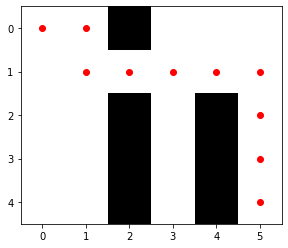

In [51]:
import matplotlib.pyplot as plt

# Visualization function
def visualize(grid, path):
    plt.imshow(grid, cmap='Greys')
    for i in range(len(path)):
        x, y = path[i]
        plt.scatter(y, x, c='r', marker='o')
    plt.show()

visualize(grid, path_list)
